In [ ]:
# Import some necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras import optimizers
from keras import Sequential, Model
from keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
ecg = pd.read_csv("ecg.csv", header = None)
ecg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
# Create our target and features
TARGET = 140
features = ecg.drop(TARGET, axis = 1)
target = ecg[TARGET]

# Split for testing and training
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
x_train.shape, y_train.shape

((3998, 140), (3998,))

In [ ]:
# We only want to train the model on normal data
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
291,1.510468,-0.267296,-2.225970,-3.350706,-4.310554,-3.906900,-2.596504,-1.800355,-1.674052,-0.856722,-0.243714,-0.354691,-0.433384,-0.394167,-0.295377,-0.227155,-0.260883,-0.324925,-0.366473,-0.442846,-0.398123,-0.497170,-0.490686,-0.539914,-0.419944,-0.689164,-0.564626,-0.684865,-0.721283,-0.617022,-0.766856,-0.728179,-0.854088,-0.850662,-0.931248,-0.944667,-0.915328,-0.982379,-0.991113,-0.975209,...,0.566732,0.766238,1.048330,1.163223,1.259060,1.528572,1.887902,2.024315,2.032643,1.940891,1.765829,1.503457,1.184037,0.866180,0.550674,-0.107970,-0.263862,-0.320988,-0.388338,-0.408498,-0.377879,-0.263424,-0.434800,-0.429174,-0.371948,-0.370305,-0.360488,-0.317007,-0.311769,-0.396150,-0.350167,-0.188676,0.443063,0.924243,1.070205,1.759431,2.198114,2.102171,1.228120,0.733822
2556,0.466564,-2.690937,-4.398513,-5.082814,-5.025965,-3.752737,-2.172779,-1.784169,-1.230063,-0.046684,-0.057808,-0.131288,-0.163724,0.048258,-0.097952,-0.063791,0.044625,-0.025770,-0.005349,-0.020507,-0.087758,-0.121451,-0.189835,-0.230775,-0.194658,-0.216785,-0.360527,-0.431498,-0.405421,-0.532247,-0.542255,-0.529476,-0.588835,-0.788511,-0.684248,-0.743822,-0.722740,-0.654752,-0.771132,-0.615750,...,0.338635,0.429709,0.383164,0.631750,0.886768,0.963270,1.089373,1.326317,1.416505,1.106172,0.673808,0.561291,0.564439,0.647654,0.702571,0.419071,-0.090231,-0.441624,-0.262367,-0.254838,-0.272598,-0.230764,-0.249463,-0.263028,-0.275750,-0.284825,-0.270807,-0.189382,-0.094605,-0.033610,0.154463,0.813916,1.661919,1.595418,1.283673,0.533919,0.401276,0.141523,0.800609,0.761724
1427,-0.764480,-2.449263,-3.089212,-3.797120,-4.252900,-3.982483,-3.070126,-1.833258,-1.368267,-1.153250,-0.402142,-0.263802,-0.403953,-0.277118,-0.246399,-0.259856,-0.213562,-0.180590,-0.277062,-0.224135,-0.307008,-0.335498,-0.328697,-0.363756,-0.400251,-0.442426,-0.318688,-0.361903,-0.392342,-0.492515,-0.495702,-0.531398,-0.559589,-0.477759,-0.545499,-0.712686,-0.699736,-0.633051,-0.721475,-0.578721,...,0.647193,0.697338,0.967140,1.334945,1.451015,1.393374,1.380117,1.120463,0.808664,0.851051,0.917266,0.666051,0.432837,0.283106,0.071272,0.090604,0.033331,-0.025510,0.009112,-0.022615,-0.041373,-0.036533,0.009360,0.039765,0.027176,0.099971,0.112568,0.076078,0.320280,0.628121,1.402759,2.033909,2.189622,2.539230,2.568340,1.902610,0.719848,-0.380672,-0.454441,-1.240778
1361,-1.226651,-3.358297,-3.810743,-4.450902,-3.648433,-2.460947,-1.852578,-1.790815,-0.898083,-0.365465,-0.426314,-0.316506,-0.388567,-0.368933,-0.437547,-0.347692,-0.365612,-0.380718,-0.343585,-0.408974,-0.419262,-0.461360,-0.539663,-0.536078,-0.489099,-0.501535,-0.603430,-0.652068,-0.684741,-0.669957,-0.740653,-0.824376,-0.896362,-0.921549,-0.938328,-0.961642,-0.932601,-0.913764,-0.868390,-0.890407,...,1.147439,1.321736,1.422485,1.718220,1.906954,2.109792,2.062374,2.034221,1.817921,1.565492,1.479005,1.240510,0.823556,0.368274,0.070355,-0.051782,-0.093686,-0.074822,-0.035220,-0.100435,-0.093650,-0.067707,-0.122455,-0.078247,-0.123873,-0.013174,-0.008252,-0.058666,-0.017660,0.088468,0.406169,0.866515,1.239229,1.072466,0.996260,0.637035,0.495594,0.369976,0.945295,1.101986
2354,-1.151460,-3.184661,-3.972529,-4.534915,-4.095032,-3.350116,-2.106593,-1.384242,-1.295681,-0.549657,-0.115673,-0.237527,-0.191180,-0.072047,-0.093332,-0.242438,-0.244099,-0.174424,-0.157637,-0.208411,-0.257565,-0.239531,-0.314648,-0.308973,-0.341565,-0.309054,-0.365582,-0.515258,-0.487021,-0.540237,-0.467446,-0.558841,-0.597562,-0.612925,-0.572997,-0.661078,-0.695849,-0.691797,-0.644697,-0.568991,...,1.390261,1.558218,1.865725,1.932185,1.863231,1.880042,1.773168,1.587699,1.274891,0.957837,0.660602,0.311566,-0.086925,-0.372897,-0.379491,-0.337247,-0.358294,-0.477205,-0.443782,-0.335809,-0.38

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range = (0, 1))
x_train_scaled = mm.fit_transform(train_data)
x_test_scaled = mm.fit_transform(x_test)

In [ ]:
# Create the model
from keras import regularizers
import keras
input = keras.Input(shape = (140, ))
encoded = layers.Dense(32, activation = 'relu')(input)
encoded = layers.Dense(16, activation = 'relu')(encoded)
encoded = layers.Dense(8, activation = 'relu')(encoded) # Bottleneck
decoded = layers.Dense(16, activation = 'relu')(encoded)
decoded = layers.Dense(32, activation = 'relu')(decoded)
decoded = layers.Dense(140, activation = 'sigmoid')(decoded)
autoencoder = keras.Model(input, decoded)

In [ ]:
# Compile & fit the model on our data
autoencoder.compile(optimizer = 'adam', loss = 'mse')
history = autoencoder.fit(x_train_scaled, x_train_scaled, batch_size = 256, epochs = 50, validation_data = (x_test_scaled, x_test_scaled))

Epoch 1/50
10/10 [==============================] - 8s 28ms/step - loss: 0.0233 - val_loss: 0.0331
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0218 - val_loss: 0.0321
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0191 - val_loss: 0.0312
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.0302
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.0289
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0113 - val_loss: 0.0282
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0100 - val_loss: 0.0279
Epoch 8/50
10/10 [==============================] - 0s 26ms/step - loss: 0.0093 - val_loss: 0.0276
Epoch 9/50
10/10 [==============================] - 0s 14ms/step - loss: 0.0087 - val_loss: 0.0274
Epoch 10/50
10/10 [==============================] - 0s 13ms/step - loss: 0.0081 - val_loss: 0.0270
Epoch 11/50
10/

In [ ]:
encoder = keras.Model(input, encoded)
decoder = keras.Model(encoded, decoded)

In [ ]:
encoded_data = encoder.predict(x_test_scaled)
decoded_data = decoder.predict(encoded_data)
encoded_data.mean()

32/32 [==============================] - 0s 1ms/step


2.5544086

32/32 [==============================] - 0s 4ms/step


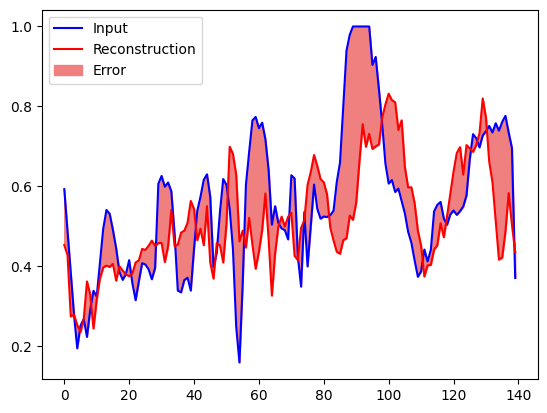

In [ ]:
def plot(features, n):
  encoded_data = encoder.predict(x_test_scaled)
  decoded_data = decoder.predict(encoded_data)
  plt.plot(features[n], 'b')
  plt.plot(decoded_data[n], 'r')
  plt.fill_between(np.arange(140), features[n], decoded_data[n], color = 'lightcoral')
  plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
  plt.show()
plot(x_test_scaled, 0)